In [1]:
import os
import pandas as pd
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
asdf = [a for a in os.listdir() if a.endswith('.parquet') and '_vids_' in a]
pls = [pl.read_parquet(p) for p in asdf]
len(pls)
# pls = sorted(pls, key=lambda x: x)

34

: 

: 

In [ ]:
for a in pls[:3]:
    print(a['num_videos'][0], a.shape[0])

10 4273
12 4378
4 4432


: 

: 

: 

: 

(5494, 144)

: 

: 

In [ ]:
# small_df = df[df['num_videos'] <= 10]

: 

: 

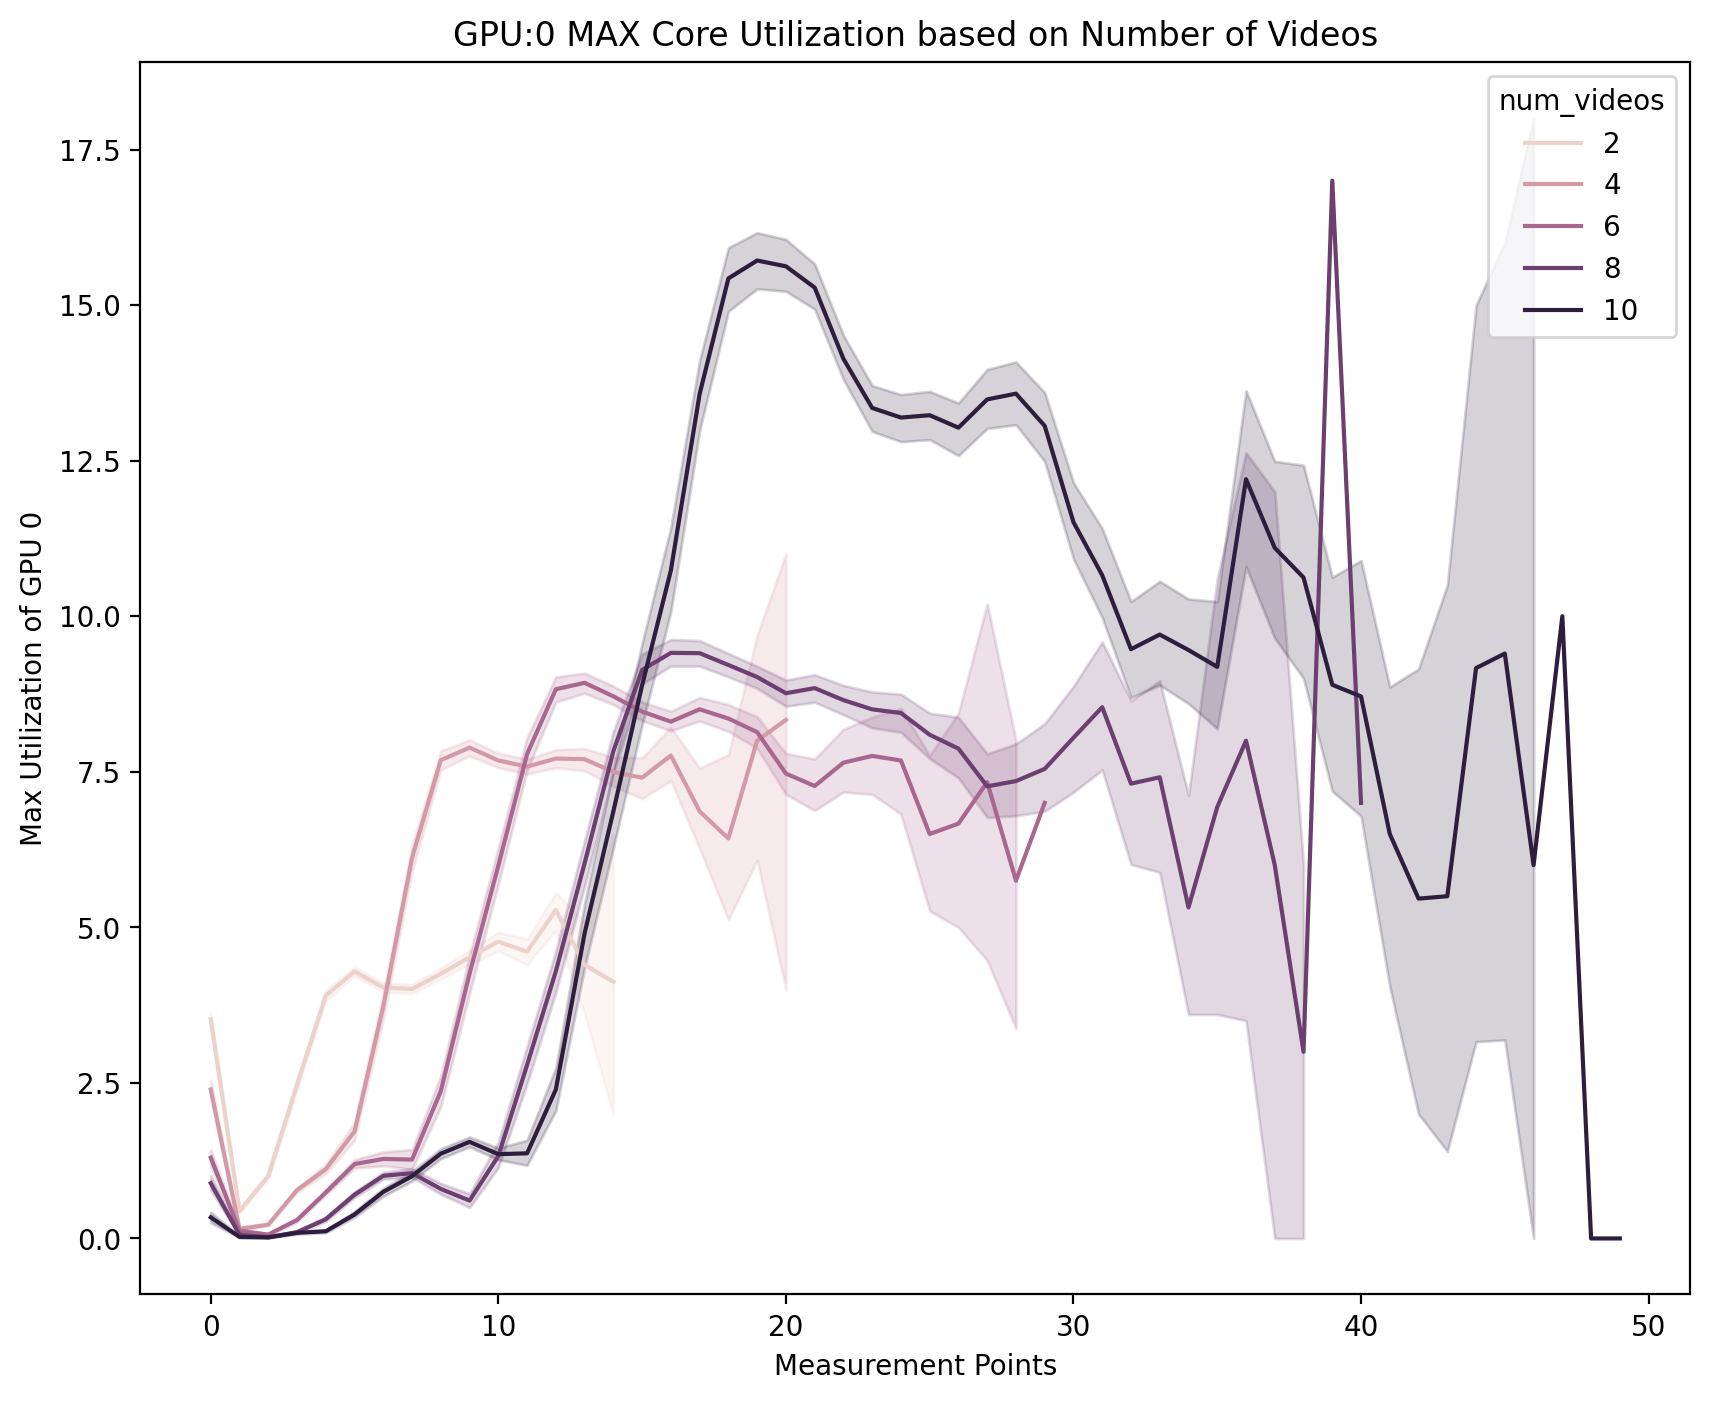

: 

: 

In [ ]:
# plt.figure(figsize=(10, 8), dpi=200)
# ax = sns.lineplot(small_df, x=small_df.index.values, y='nvitop/gpu:0/gpu_utilization (%)/max', hue='num_videos')

# ax.set_title('GPU:0 MAX Core Utilization based on Number of Videos')
# ax.set_xlabel('Measurement Points')
# ax.set_ylabel('Max Utilization of GPU 0')
# # plt.legend(prop={'size': 20}) 

# plt.show()


Text(0, 0.5, 'Max Utilization of GPU:1')

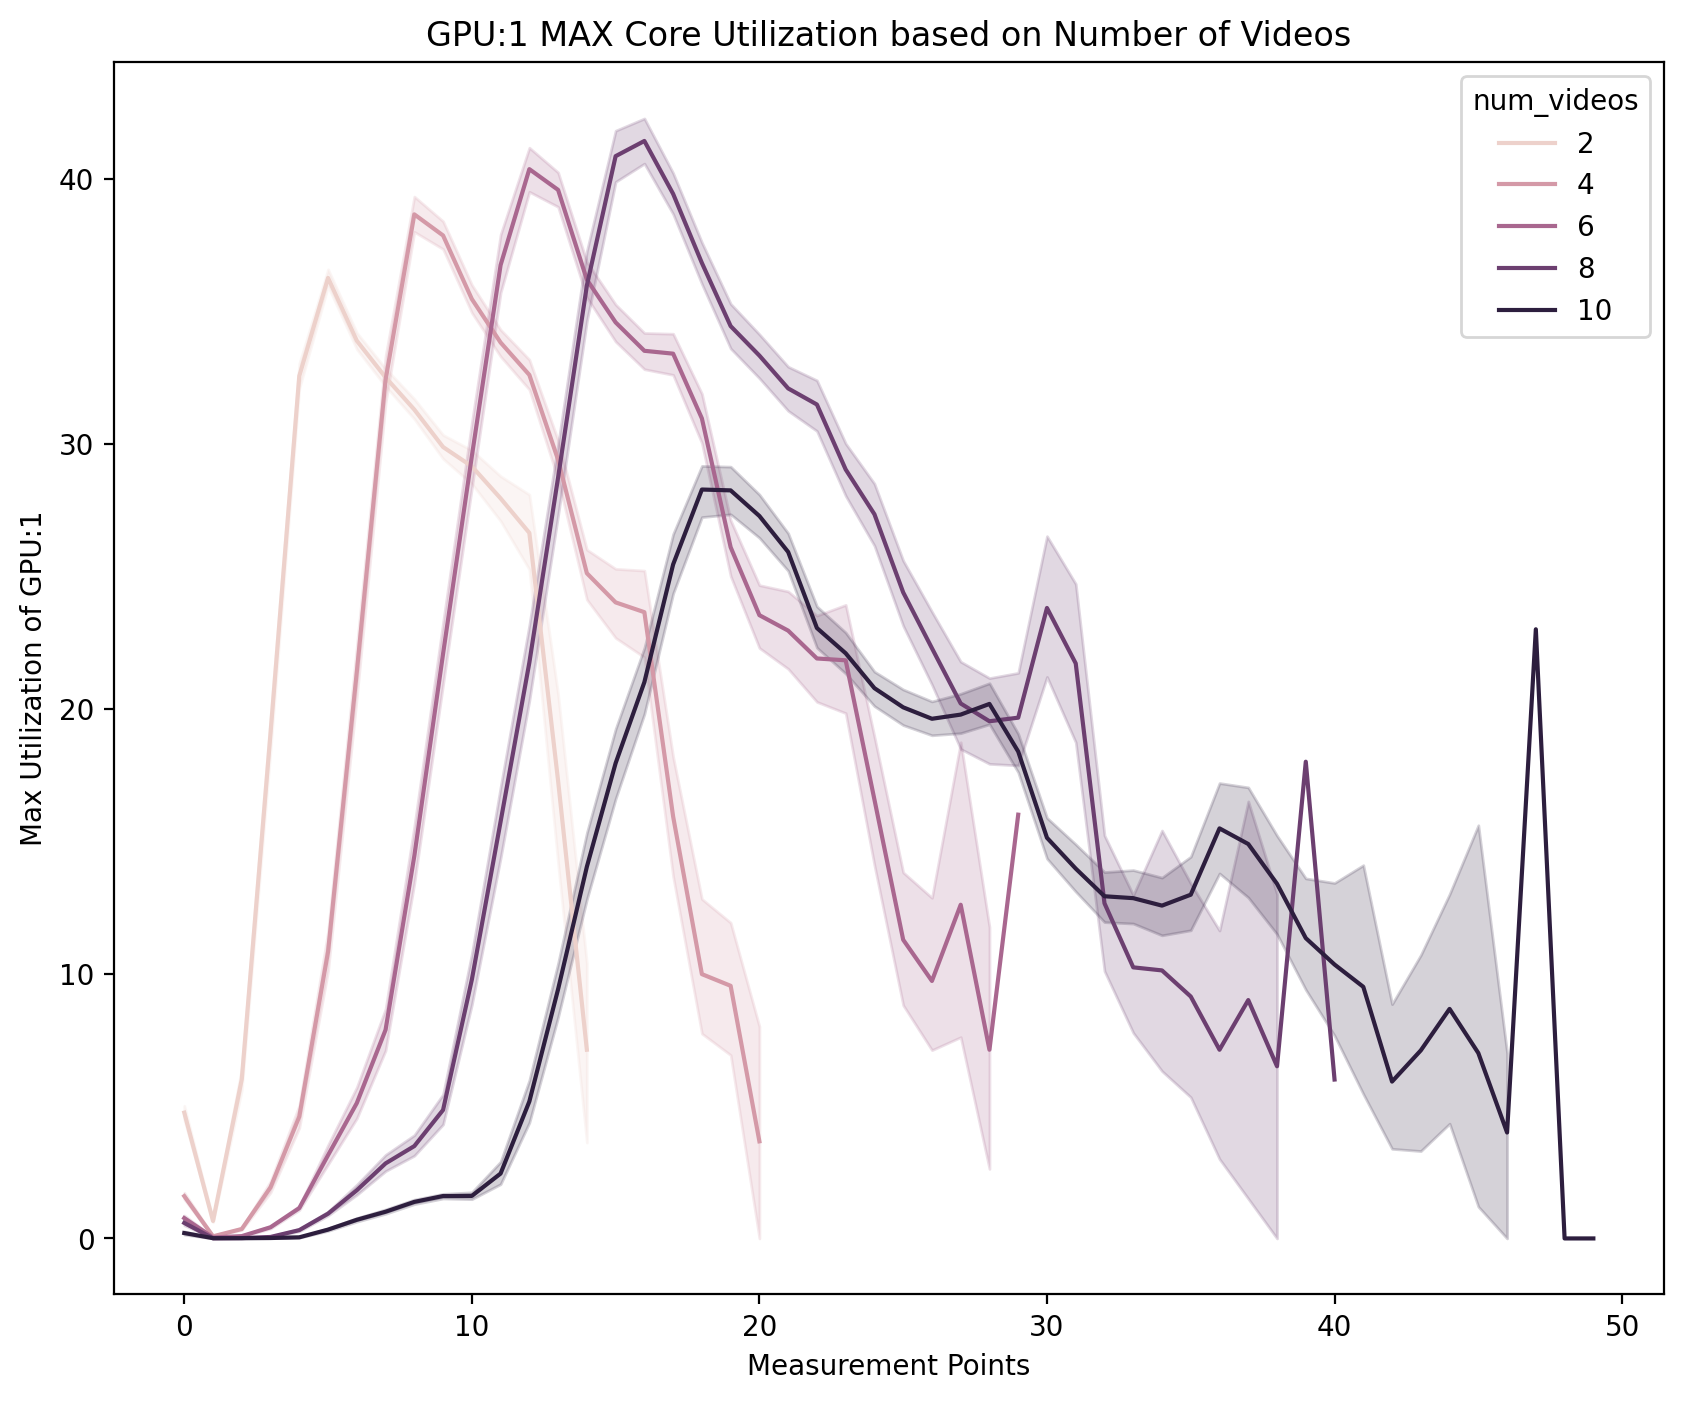

: 

: 

In [ ]:
# plt.figure(figsize=(10, 8), dpi=200)
# ax = sns.lineplot(small_df, x=small_df.index.values, y='nvitop/gpu:1/gpu_utilization (%)/max', hue='num_videos')

# ax.set_title('GPU:1 MAX Core Utilization based on Number of Videos')
# ax.set_xlabel('Measurement Points')
# ax.set_ylabel('Max Utilization of GPU:1')


In [ ]:
# partitions = dl.partition_by(['num_videos'])

: 

: 

In [ ]:
# part_lengths = [len(p) for p in partitions]

: 

: 

Text(0, 0.5, 'GPU Power')

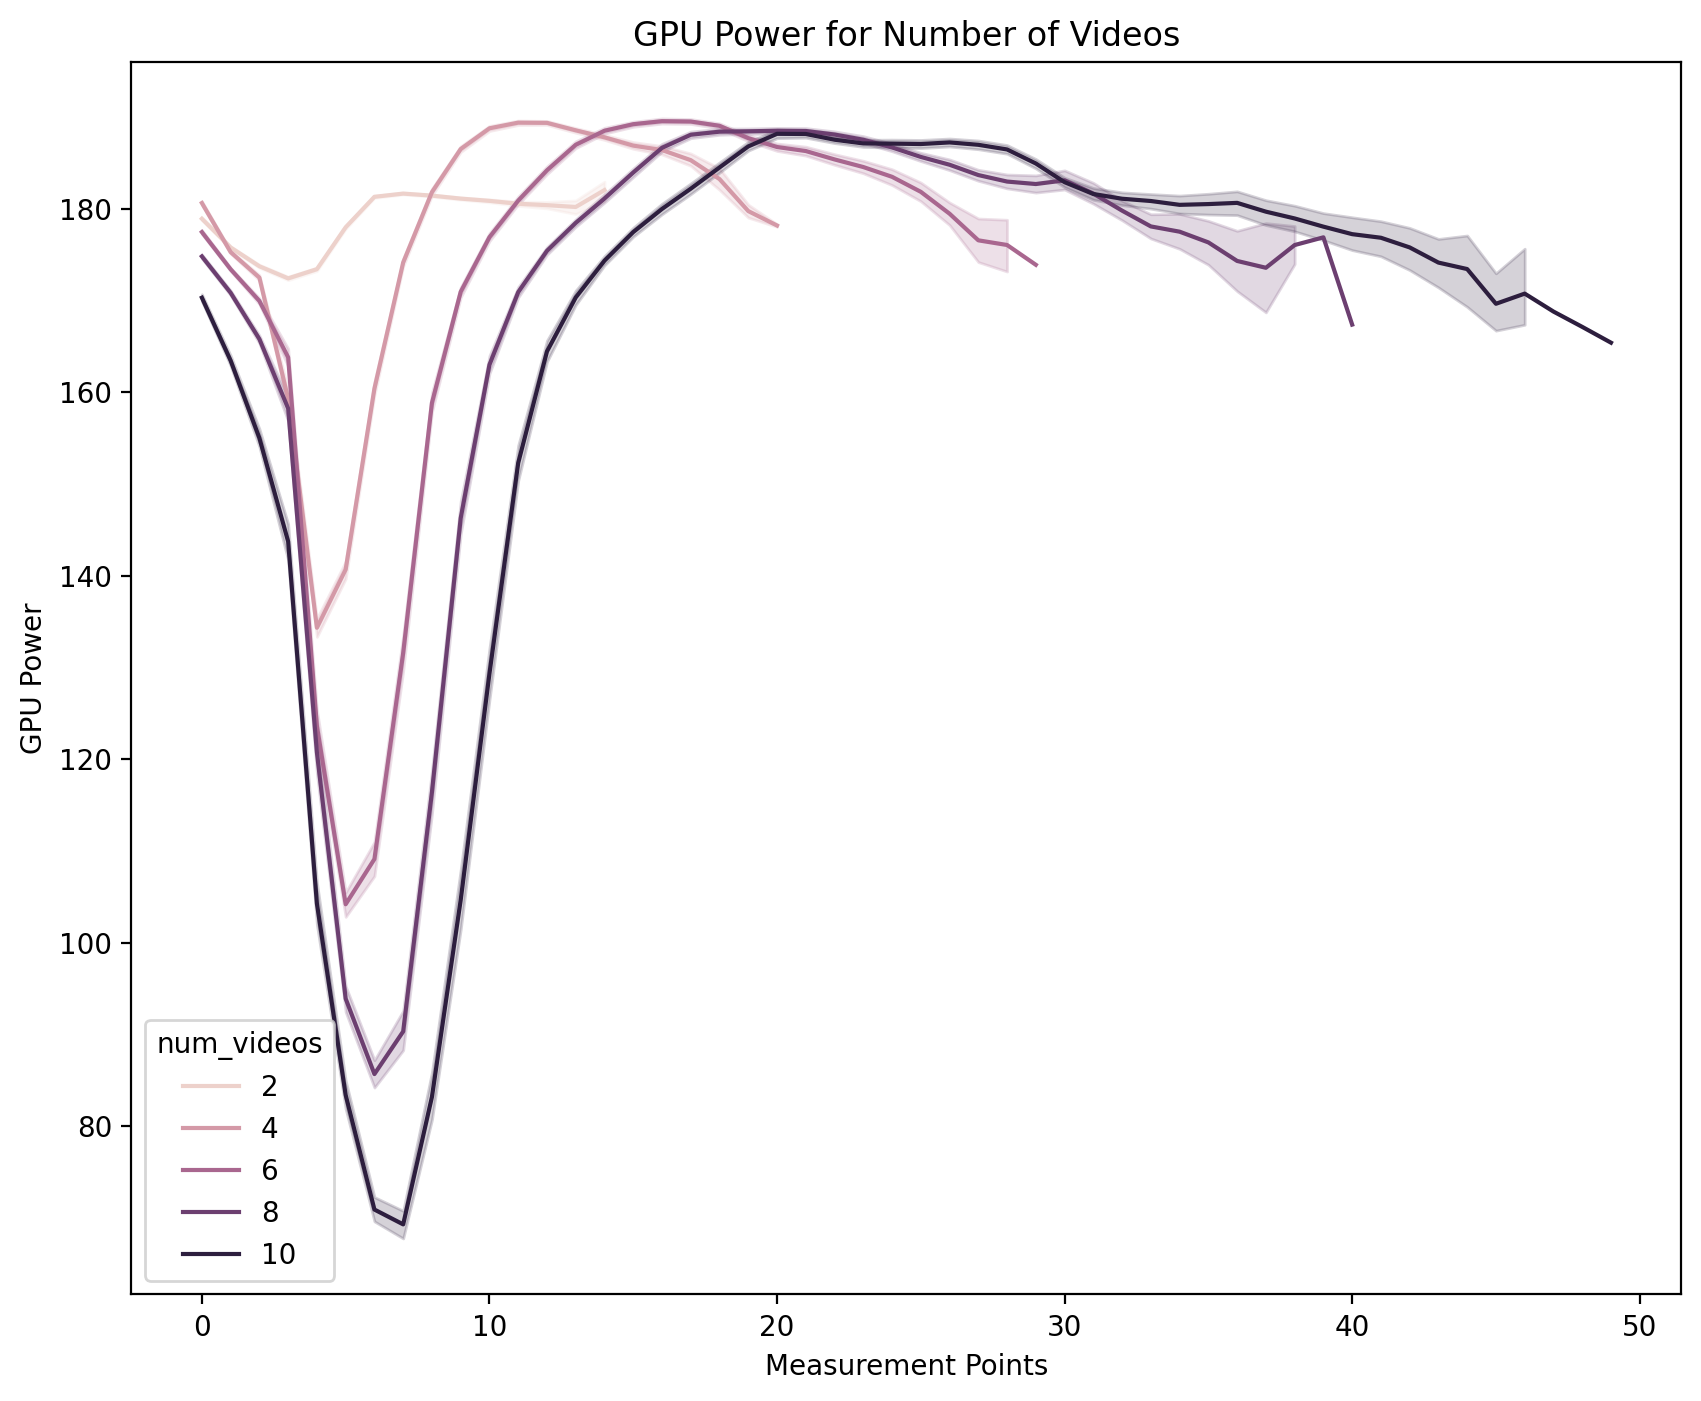

: 

: 

In [ ]:
# plt.figure(figsize=(10, 8), dpi=200)
# ax = sns.lineplot(small_df, x=small_df.index.values, y='gpu_power', hue='num_videos')

# ax.set_title('GPU Power for Number of Videos')
# ax.set_xlabel('Measurement Points')
# ax.set_ylabel('GPU Power')

In [ ]:
duration_per_num_videos = dl.group_by('num_videos', maintain_order=True).agg([
    pl.col('duration').sum(), 
    pl.col('gpu_energy').sum(),
    ])


: 

: 

: 

: 

Text(0.5, 0, 'Number of Videos Encoded')

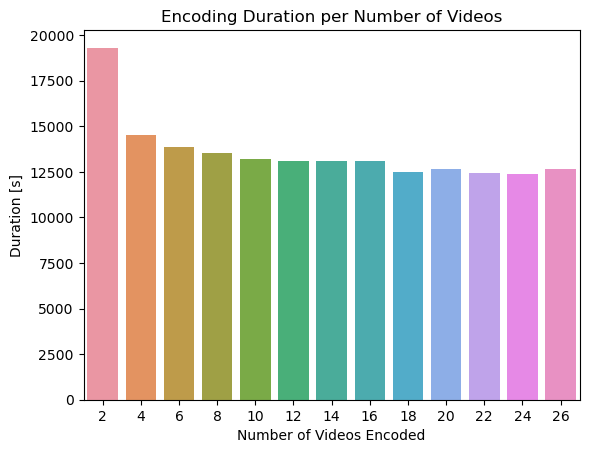

: 

: 

In [ ]:
ax = sns.barplot(x=duration_per_num_videos['num_videos'].to_list(), y=duration_per_num_videos['duration'].to_list())
ax.set_title('Encoding Duration per Number of Videos')
ax.set_ylabel('Duration [s]')
ax.set_xlabel('Number of Videos Encoded')

Text(0.5, 0, 'Number of Videos Encoded in Parallel')

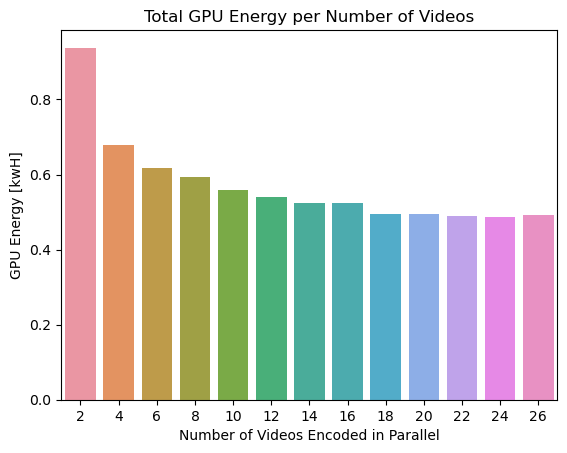

: 

: 

In [ ]:
ax = sns.barplot(x=duration_per_num_videos['num_videos'].to_list(), y=duration_per_num_videos['gpu_energy'].to_list())
ax.set_title('Total GPU Energy per Number of Videos')
ax.set_ylabel('GPU Energy [kwH]')
ax.set_xlabel('Number of Videos Encoded in Parallel')

In [ ]:
for p in partitions:
    num_measurements = p.shape[0]
    # print(p['num_videos'][0])
    num_videos = p['num_videos'][0]
    duration = p.group_by('num_videos', maintain_order=True).agg(pl.col('duration').sum())
    print(f'Num Vids: {num_videos} - Num Measurements: {num_measurements} - Duration {duration}')

Num Vids: 2 - Num Measurements: 41222 - Duration shape: (1, 2)
┌────────────┬──────────────┐
│ num_videos ┆ duration     │
│ ---        ┆ ---          │
│ i64        ┆ f64          │
╞════════════╪══════════════╡
│ 2          ┆ 19303.898373 │
└────────────┴──────────────┘
Num Vids: 4 - Num Measurements: 30498 - Duration shape: (1, 2)
┌────────────┬──────────────┐
│ num_videos ┆ duration     │
│ ---        ┆ ---          │
│ i64        ┆ f64          │
╞════════════╪══════════════╡
│ 4          ┆ 14538.113386 │
└────────────┴──────────────┘
Num Vids: 6 - Num Measurements: 28713 - Duration shape: (1, 2)
┌────────────┬─────────────┐
│ num_videos ┆ duration    │
│ ---        ┆ ---         │
│ i64        ┆ f64         │
╞════════════╪═════════════╡
│ 6          ┆ 13868.04735 │
└────────────┴─────────────┘
Num Vids: 8 - Num Measurements: 27863 - Duration shape: (1, 2)
┌────────────┬──────────────┐
│ num_videos ┆ duration     │
│ ---        ┆ ---          │
│ i64        ┆ f64          │
╞════

: 

: 

: 

: 